# Business Case:-
- Your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

# Problem Statement

- Task 1:-Prepare a complete data analysis report on the given data.

- Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

- Task 3:- Compare between various models and find the classifier that works better.


# Use case of HandwritingDigits Recognition :-
- Post Services: 
    - We can use handwriting recognition to identify and sort postal codes based on there digits. It will speed up the process.
- Banking and Finance:
    - We can we Handwriting recognition to to read Handwritten checks. Here we will check amounts,account numbers, and other          information on checks to automate the check processing.
- Number plate Recognition:
    - We can recognize the number plate by the last 4 digits it might be helpful for Law Enforcements.

In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

tf.get_logger().setLevel('ERROR')

In [2]:
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train.shape # 60000 training samples

(60000, 28, 28)

In [8]:
X_train[0] # 2-d array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

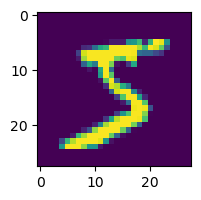

In [9]:
plt.figure(figsize=(15,2)) # Just checking the image
plt.imshow(X_train[0])

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
names = ("Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine")

In [12]:
names[5]

'Five'

In [13]:
def image(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(names[y[index]])

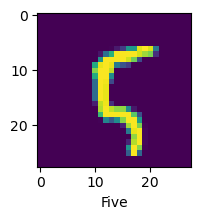

In [14]:
image(X_train,y_train,100) 

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from keras import regularizers
from tensorflow.keras import layers,models

import numpy as np

from sklearn.metrics import accuracy_score,classification_report

### Model Creation

#### 1. KNeighborsClassifier model

In [16]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) # Coverting it into 2d
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [17]:
X_train_flat.shape

(60000, 784)

In [18]:
knn = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
knn.fit(X_train_flat,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [19]:
y_pred_knn = knn.predict(X_test_flat)
print(f" Accuracy : {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test,y_pred_knn))

 Accuracy : 0.9665
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.94      1.00      0.97      1135
           2       0.98      0.95      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



#### 2. SVC model

In [20]:
X_train_scaled = StandardScaler().fit_transform(X_train_flat)
X_test_scaled = StandardScaler().fit_transform(X_test_flat)

In [21]:
svc = SVC(kernel='linear',verbose=1)
svc.fit(X_train_scaled, y_train)

[LibSVM]

SVC(kernel='linear', verbose=1)

In [22]:
y_pred_svc = svc.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,y_pred_svc))

Accuracy: 0.928
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.89      0.93      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.89      0.90       892
           6       0.96      0.93      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.88      0.90       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



#### 3. ANN model

In [23]:
# Converting the data in the range of 0 to 1
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train_shaped = np.reshape(X_train, (-1, 28, 28, 1))
X_test_shaped = np.reshape(X_test, (-1, 28, 28, 1))

In [25]:
# Initialize Ann
model = Sequential()

In [26]:
model.add(Flatten(input_shape=(28,28,1))) # Input Layer
model.add(Dense(units=128,activation=PReLU()))# 1st Hidden Layer
model.add(Dense(units=64,activation=PReLU())) #  2nd hidden Layer
model.add(Dense(units=10,activation='softmax')) # Output layer

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history2 = model.fit(X_train_shaped,y_train,validation_split=0.33,epochs=2)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8584 - loss: 0.5035 - val_accuracy: 0.9543 - val_loss: 0.1511
Epoch 2/2
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9641 - loss: 0.1175 - val_accuracy: 0.9616 - val_loss: 0.1251


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,736 (1.25 MB)

 Trainable params: 109,578 (428.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 219,158 (856.09 KB)

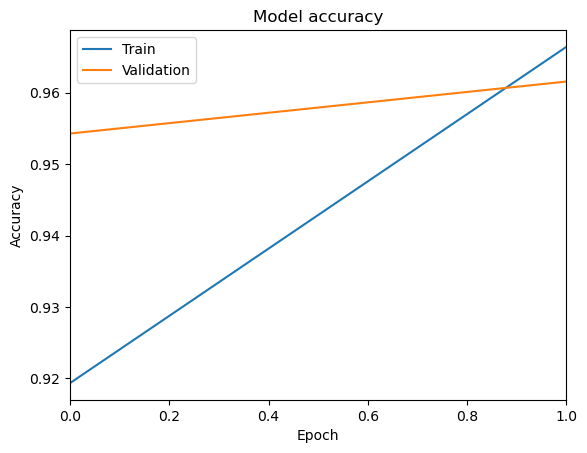

In [28]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim((0,1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
y_ann = model.predict(X_test_shaped)
y_pred_ann = np.argmax(y_ann, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
print(f" Accuracy : {accuracy_score(y_test, y_pred_ann)}")
print(classification_report(y_test,y_pred_ann))

 Accuracy : 0.9648
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      0.99      0.98      1135
           2       0.99      0.93      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.98      0.94      0.96       892
           6       0.95      0.98      0.96       958
           7       0.96      0.97      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



#### 4. CNN model

In [31]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D((2, 2),padding="same"))
cnn.add(layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2),padding="same"))
cnn.add(layers.Conv2D(64,(3,3),activation='relu'))

cnn.add(Flatten()) 
cnn.add(Dense(64,activation="relu"))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

history = cnn.fit(X_train_shaped,y_train,validation_split=0.25,epochs=2)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8855 - loss: 0.3603 - val_accuracy: 0.9815 - val_loss: 0.0638
Epoch 2/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9849 - loss: 0.0506 - val_accuracy: 0.9847 - val_loss: 0.0495


In [32]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,984 (1.40 MB)

 Trainable params: 121,994 (476.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,990 (953.09 KB)

In [33]:
y_cnn = cnn.predict(X_test_shaped)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [34]:
y_test.shape

(10000,)

In [35]:
y_pred_cnn = np.argmax(y_cnn,axis=1)

In [36]:
print(f" Accuracy : {accuracy_score(y_test, y_pred_cnn)}")
print(classification_report(y_test,y_pred_cnn))

 Accuracy : 0.9874
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



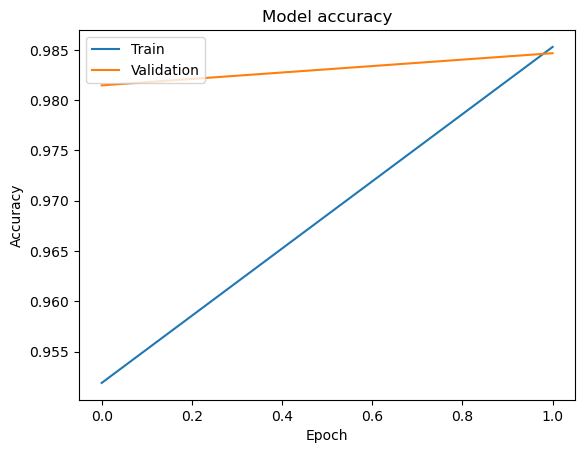

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Also, we have taken 2 Epoch for ANN and CNN because as we are increasing the number of Epoch the difference between "Accuracy" and "Val-Accuracy" is also increasing. Here, we have to minimize the difference between them, Epoch "2" was the point where difference starts increasing.

## Model comparision

- SVC is giving the lowest accuracy of 92%.
- CNN is giving the best accuracy of 98% and ANN, KNN is giving 96% accuracy which is slightly lesser than CNN.

#### As Cnn is giving best accuracy but the model is little overfitted. So, we will try cross validation to see of it performs same in each fold or not. 

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier

In [39]:
cnn_classifier = KerasClassifier(model=cnn, epochs=10, batch_size=32, verbose=1)

num_folds = 5

skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

cv_scores = cross_val_score(cnn_classifier, X_train, y_train, cv=skf)

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `tf.saved_model.save()` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=C:\Users\Admin\AppData\Local\Temp\tmpme4l8oxa.

In [ ]:
cv_scores_str = ", ".join([f"{score:.4f}" for score in cv_scores])
print("Cross-Validation Accuracy Scores:", cv_scores_str)
print("Mean Accuracy:", np.mean(cv_scores))

 After doing cross validation on CNN we can clearly the mean of the accuracy is around 99% which is great.

### So ,we will be selecting CNN as our generalized model.

-------

# Report on Challenges faced

- As this was our first Deep learning project it took more time to understand the models on how it will work in images.
- Also, when we were creating the SVC and KNN model at that time we don't know how to train the model on this kind of data but eventually we were able to figure that out as well.


# Application of HandwritingDigits Recognition

- Education and Assessments:
    - Grading handwritten exams, assessments, assignments, and answer sheets in educational institutions to automate grading         processes, provide instant feedback to students, and save time for educators.
- Data Entry and Form Processing:
    - Extracting and digitizing handwritten numeric data from forms, surveys, applications, and questionnaires for efficient           data entry, analysis, reporting, and decision-making in various industries.

-------

# Conclusion

- In conclusion, developing a successful Handwriting Recognition model will automate most of the work which will reduce manual effort, cost, minimizes error and increases efficiency, making it a valuable technology across different industries and applications.